In [ ]:
#
'''
# Mini-Project: House Price Prediction (Time: 2 hours)
# Objective: Build a model to predict house prices based on provided features.
# Focus on data exploration, preprocessing, model selection, and interpretation.
'''
#

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from collections import Counter

boston_df = pd.read_csv('/content/HousingData.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:

# The Boston housing dataset contains 506 observations and 14 variables and are decribed as follows;

'''
CRIM: per capita crime rate by town
ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS: proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: nitric oxides concentration (parts per 10 million)
RM: average number of rooms per dwelling
AGE: proportion of owner-occupied units built prior to 1940
DIS: weighted distances to ﬁve Boston employment centers
RAD: index of accessibility to radial highways
TAX: full-value property-tax rate per $10,000.
PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
LSTAT: Lower status of the population.
MEDV: Median value of owner-occupied homes in $1000s
'''

In [ ]:
# 1. Exploratory Data Analysis (EDA) (30 minutes)
# • Give an overview of the dataset: any notable patterns or correlations?
# • Identify potential outliers and suggest handling methods.

In [ ]:
# The following provides a statistical over of the dataset

'''
This is helpfull if you are looking for a specific piece of information.
More often than not, its better to visualise key areas.
'''

boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


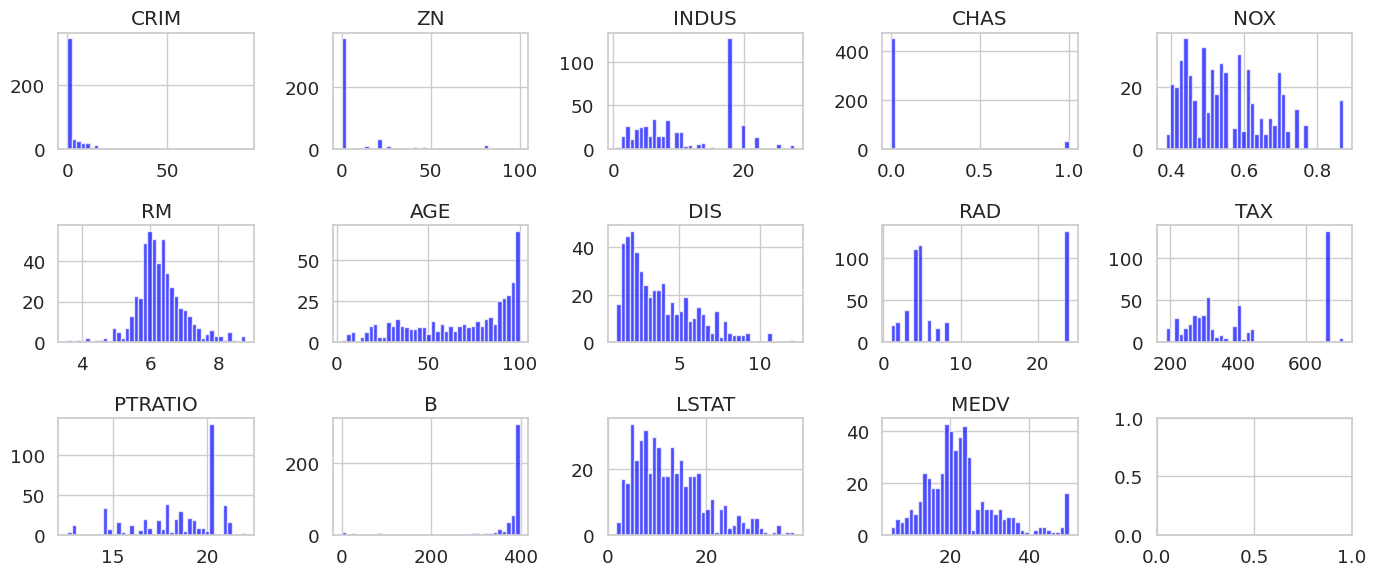

In [ ]:

# Visualisation of Data Distribution

'''
Some noteable skews in data distributions here include;
  Strong left: Dis, Crim, Zn
  Strong right: Age, Ptratio

Its also good to note Chas is a categorical variable.
'''

# Create subplots
fig, axes = plt.subplots(3, 5, figsize=(14, 6))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through features and create histograms
for i, feature in enumerate(boston_df.columns):
    ax = axes[i]
    ax.hist(boston_df[feature], bins=40, color='blue', alpha=0.7)
    ax.set_title(feature)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

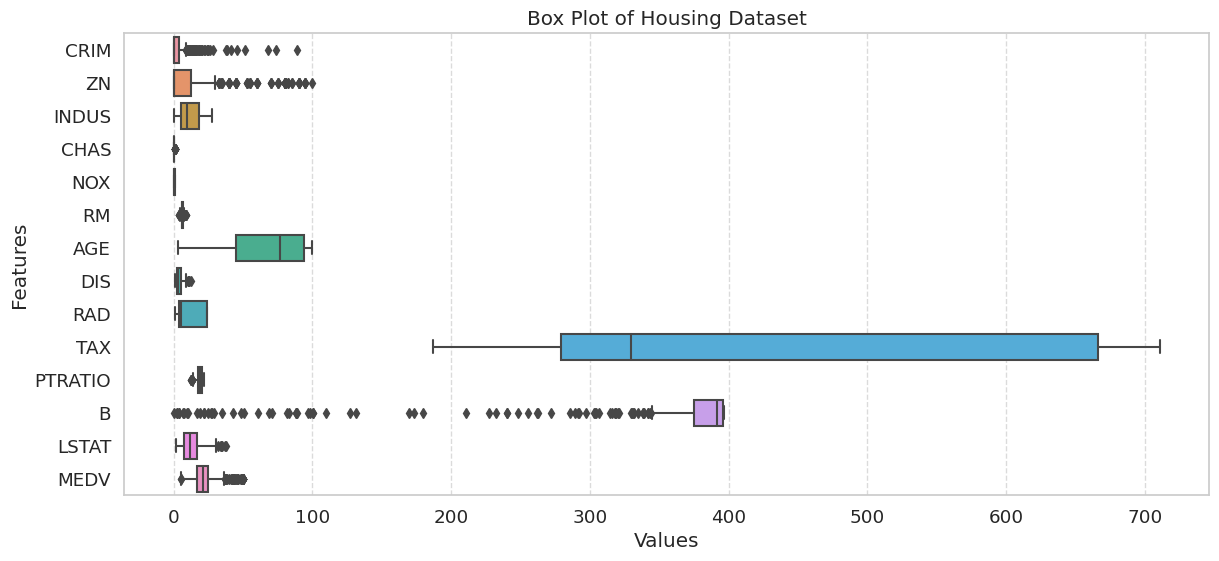

In [ ]:

# The following is a Box Plot of Housing Dataset

'''
Some noteable metrics include the wide variance Tax and outliers in CRIM, ZN, and B.
The interquartile range (25th to 75th percentile) is represented by the bounding box.
The min and max is represented the by the Tails or Whiskers of the box.
Outliers are denoted with dashes.
'''

plt.figure(figsize=(14, 6))

sns.boxplot(data=boston_df, orient='h')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.title('Box Plot of Housing Dataset')
plt.xlabel('Values')
plt.ylabel('Features')

plt.show()

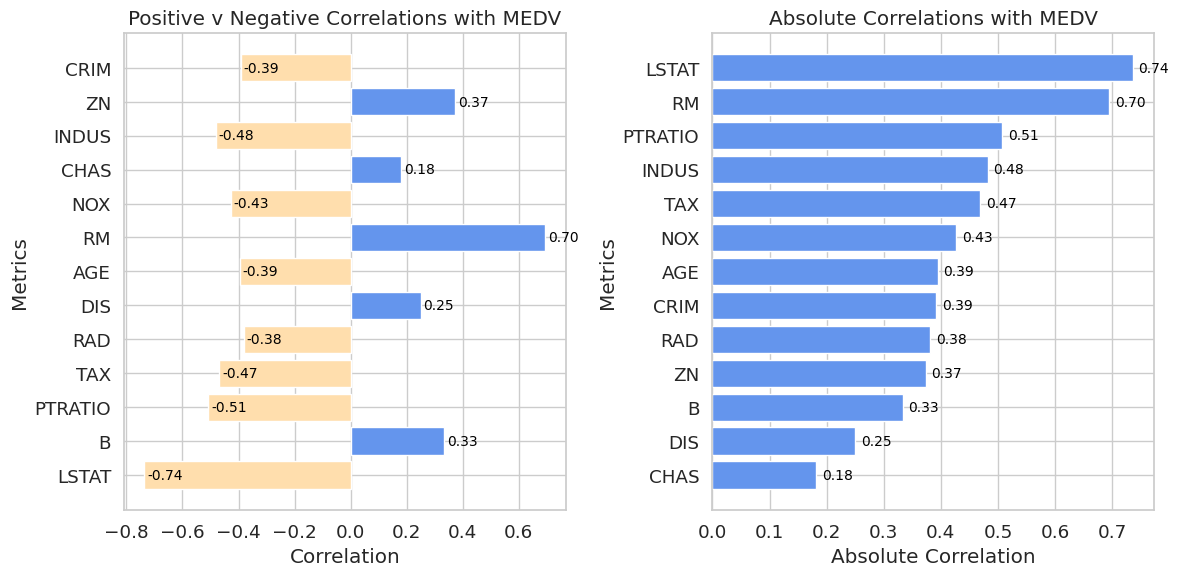

In [ ]:

# Here we correlate our features with target

'''
Its good to note the standard method for corr() uses Pearson Correlation, which is the linear correlation between two variables
and therfore not applicable to Chas.
The following plots show;
  Left : The positive and negative correlation between features and target.
  Right : The absolute correlation between features and target.
'''


label = ['MEDV']
metrics = [x for x in boston_df.columns if x not in label]


# Extract the correlations of the label with other metrics
correlations_vector = boston_df.corr()['MEDV'][metrics]

# Determine colors based on correlation sign
colors = ['cornflowerblue' if corr > 0 else 'navajowhite' for corr in correlations_vector]

# Create the left plot - Correlations with MEDV
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
bars = plt.barh(correlations_vector.index, correlations_vector, color=colors)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}', va='center', fontsize=10, color='black')
plt.title('Positive v Negative Correlations with MEDV')
plt.ylabel('Metrics')
plt.xlabel('Correlation')
plt.gca().invert_yaxis()
plt.tight_layout()

# Calculate absolute correlations and sort
correlations_vector_abs = abs(correlations_vector)
correlations_vector_abs_sorted = correlations_vector_abs.sort_values(ascending=False)

# Create the right plot - Absolute Correlations (sorted) with percentages
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
bars = plt.barh(correlations_vector_abs_sorted.index, correlations_vector_abs_sorted, color='cornflowerblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}', va='center', fontsize=10, color='black')
plt.title('Absolute Correlations with MEDV')
plt.ylabel('Metrics')
plt.xlabel('Absolute Correlation')
plt.gca().invert_yaxis()
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:

# Outliers

'''
When dealing with outliers its important to take the domain specific information into account.
Depending on this informationwe would handle the outliers with methods such as removing, capping, or transforms.
If we were to remove the outliers from our data we would see too great of a reduction in data from 506 to 273 rows.
'''

for i in boston_df.columns:
  if i != 'MEDV':
      data = boston_df[i]
      Q1 = np.percentile(data, 25)
      Q3 = np.percentile(data, 75)
      IQR = Q3 - Q1

      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      outliers = data[(data < lower_bound) | (data > upper_bound)]
      percentage_outliers = (len(outliers) / len(data)) * 100

      if percentage_outliers > 0:

        print(f"{i} percentage of outliers: {percentage_outliers:.2f}%")

Q1_total = boston_df.quantile(0.25)
Q3_total = boston_df.quantile(0.75)
IQR_total = Q3_total - Q1_total

print("\nOld data set shape with Outliers ",boston_df.shape)
boston_df_out = boston_df[~((boston_df < (Q1_total - 1.5 * IQR_total)) |(boston_df > (Q3_total + 1.5 * IQR_total))).any(axis=1)]
print("New data set shape without Outliers ",boston_df_out.shape)


RM percentage of outliers: 5.93%
DIS percentage of outliers: 0.99%
PTRATIO percentage of outliers: 2.96%
B percentage of outliers: 15.22%

Old data set shape with Outliers  (506, 14)
New data set shape without Outliers  (273, 14)


In [ ]:
# 2. Data Preprocessing (30 minutes)
# • Address any missing values.
# • Convert categorical variables, if needed.
# • Normalize or scale features, if necessary.

In [ ]:

# Missing values

'''
The data contains 506 rows of information, 112 of which contatin missing values.
This is too high of a cost to the dataset so we will look at estimating these values with predictive modelling.
'''

# Assuming boston_df is your DataFrame
num_rows_before = boston_df.shape[0]

# Count rows with at least one NaN value
num_rows_with_nan = (boston_df.isna().sum(axis=1) > 0).sum()

# Calculate the number of rows that would be removed
num_rows_removed = num_rows_with_nan

print(f"Number of rows before removing NaN values: {num_rows_before}")
print(f"Number of rows with NaN values: {num_rows_with_nan}")


missing_value_columns = [x for x in boston_df.columns if boston_df[x].isna().sum() > 0]
print(f"\nColumns that contain missing values {missing_value_columns}")


Number of rows before removing NaN values: 506
Number of rows with NaN values: 112

Columns that contain missing values ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']


In [ ]:

# First we check the data types of rows that contain missing values

for i in ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']:
  print(type(boston_df[i][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [ ]:
1/.1

10.0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

'''
This method build a models to estimate missing values.
For each feature missing values, seperate the feature from the rest of the data and a rergressor model to estimate its value.
We use an adjusted root mean squared error to show the error of estimation relative to the data range.
'''

def pred_missing():

    boston_df2 = boston_df.copy()

    for i in ['CHAS', 'CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT']:

        boston_df_missing = boston_df.copy()
        boston_df_missing = boston_df_missing.dropna()

        # Split the data into features and target variable
        X_split = boston_df_missing.drop(columns=[i])
        y_split = boston_df_missing[i]

        # Split the data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X_split.values, y_split.values, test_size=0.2, random_state=42)

        if i != 'CHAS':
          model = xgb.XGBRegressor()
        else:
          model = xgb.XGBClassifier()

        model.fit(X_train, Y_train)

        # Predict the missing values
        predicted_values = model.predict(X_test)

        if i == 'CHAS':
          acc = np.round(accuracy_score(y_true=Y_test, y_pred=predicted_values), 2)
          min, max = boston_df_missing[i].min(), boston_df_missing[i].max()
          print(f'Column: {i}, Data Range {np.round(max - min)}, Accuracy {acc}')
        else:
          # Calculate RMSE
          rmse = np.round(np.sqrt(mean_squared_error(Y_test, predicted_values)),3)
          min, max = boston_df_missing[i].min(), boston_df_missing[i].max()
          print(f'Column: {i}, Data Range {np.round(max - min)}, Rmse {rmse}')

        #
        # Predict missing values
        #

        for index, value in enumerate(boston_df2[i]):
            if np.isnan(value):
                # Prepare the input data for prediction
                input_data = boston_df2.copy()
                input_data = input_data.drop(i, axis =1)
                input_data = input_data.iloc[index, :].values.reshape(1, -1)  # Use X_test, ensure it has column names
                # Predict the missing value
                predicted_value = model.predict(input_data)
                # Update the DataFrame with the predicted value
                boston_df2.loc[index, i] = predicted_value

    return boston_df2

boston_df2 = pred_missing()

print(f'\nNumber of missing values {boston_df2.isna().sum()}')

Column: CHAS, Data Range 1.0, Accuracy 0.95
Column: CRIM, Data Range 89.0, Rmse 2.782
Column: ZN, Data Range 100.0, Rmse 6.472
Column: INDUS, Data Range 27.0, Rmse 1.177
Column: AGE, Data Range 97.0, Rmse 15.987
Column: LSTAT, Data Range 36.0, Rmse 3.632

Number of missing values CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:

'''
Here we see the same row before and after missing value estimation.
'''

for index, values in boston_df.iterrows():
  for value in values:
    if value is np.nan:
      break

before = list(boston_df.iloc[index])
after = list(boston_df2.iloc[index])

example_df = pd.DataFrame([before, after], columns = boston_df.columns)
example_df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.04741,0.0,11.93,0.0,0.573,6.03,NaN,2.505,1.0,273.0,21.0,396.9,7.88,11.9
1,0.04741,0.0,11.93,0.0,0.573,6.03,84.830365,2.505,1.0,273.0,21.0,396.9,7.88,11.9


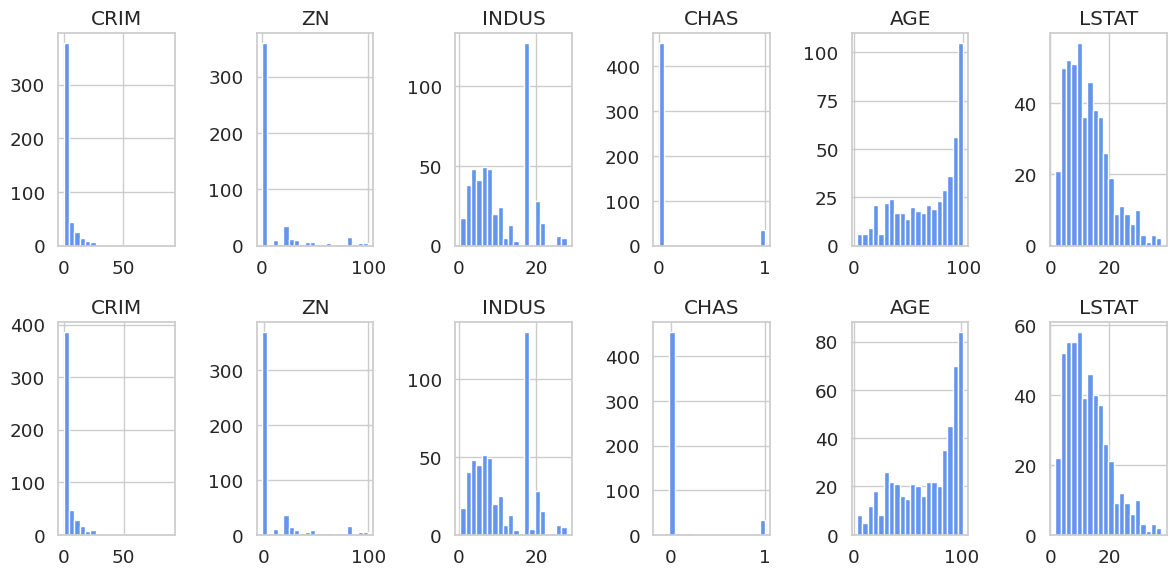

In [ ]:

'''
Here we plot the data distribution before and after missing value estimation.
'''


# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12, 6))

# Loop through features and create histograms for the first dataframe
for i, feature in enumerate(list(boston_df[missing_value_columns].columns)):
    ax = axes[0, i]
    ax.hist(boston_df[feature], bins=20, color='cornflowerblue')
    ax.set_title(feature)

# Loop through features and create histograms for the second dataframe
for i, feature in enumerate(list(boston_df2[missing_value_columns].columns)):
    ax = axes[1, i]
    ax.hist(boston_df2[feature], bins=20, color='cornflowerblue')
    ax.set_title(feature)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# 3. Model Building (45 minutes)
# • Partition the data into training and test sets.
# • Opt for a relevant algorithm for your model and justify this decision.
# • Proceed with model training.

In [ ]:
from sklearn.preprocessing import StandardScaler

'''
Here we scale the data within a range to ensure the model does not give preferencial importance to values
in a higher range.
Its also important to remove any categorical values and re-introduce them after scaling.
'''

# Scale data
boston_df3 = boston_df2.copy()

label_values = boston_df3['MEDV']
category_values = boston_df3['CHAS']
feature_values = boston_df3.drop(['MEDV', 'CHAS'], axis = 1)

scaler = StandardScaler()
feature_values_sc = scaler.fit_transform(feature_values)

# Create DataFrames for standardized features and category values
boston_features_sc = pd.DataFrame(feature_values_sc, columns=feature_values.columns)

# Combine standardized features and category values
boston_features_sc = pd.concat([boston_features_sc, category_values], axis=1)

boston_features_sc.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
0,-0.420004,0.286373,-1.287021,-0.144217,0.413672,-0.122451,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.078671,0.0
1,-0.417589,-0.485711,-0.592497,-0.740262,0.194274,0.367617,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.493602,0.0
2,-0.417592,-0.485711,-0.592497,-0.740262,1.282714,-0.269114,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.212281,0.0
3,-0.417007,-0.485711,-1.305989,-0.835284,1.016303,-0.816416,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.365581,0.0
4,-0.412788,-0.485711,-1.305989,-0.835284,1.228577,-0.515937,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.070279,0.0


In [ ]:

from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from keras.models import Sequential
from keras.layers import Dense

X_train, X_test, Y_train, Y_test = train_test_split(boston_features_sc, label_values, test_size=0.2, random_state=42)
# Define the parameter grids for each model
histgb_param_grid = {'max_iter': [100, 300, 600],'max_depth': [3, 5, 7, 14]}
xgb_param_grid = param_grid = {'n_estimators': [100, 300, 600],'learning_rate': [0.001, 0.01, 0.1]}

# Start hgbr
hgbr = HistGradientBoostingRegressor()
hgbr_grid_search = GridSearchCV(hgbr, histgb_param_grid)
hgbr_grid_search.fit(X_train, Y_train)
y_pred_hgbr = hgbr_grid_search.predict(X_test)

# Start xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid)
xgb_grid_search.fit(X_train, Y_train)
y_pred_xgb = xgb_grid_search.predict(X_test)


print(f"\nBest Parameters for HGBR: {hgbr_grid_search.best_params_}")
print(f'HGBR RMSE Score: {np.round(np.sqrt(mean_squared_error(Y_test, y_pred_hgbr)),3)}')
print(f'HGBR R2 Accuracy: {np.round(r2_score(Y_test,y_pred_hgbr), 3)}')

print(f"\nBest Parameters for XGB: {xgb_grid_search.best_params_}")
print(f'XGB RMSE Score: {np.round(np.sqrt(mean_squared_error(Y_test, y_pred_xgb)),3)}')
print(f'XGB R2 Accuracy: {np.round(r2_score(Y_test,y_pred_xgb), 3)}')



Best Parameters for HGBR: {'max_depth': 3, 'max_iter': 300}
HGBR RMSE Score: 3.012
HGBR R2 Accuracy: 0.876

Best Parameters for XGB: {'learning_rate': 0.01, 'n_estimators': 600}
XGB RMSE Score: 2.387
XGB R2 Accuracy: 0.922


In [ ]:

from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from keras.models import Sequential
from keras.layers import Dense

'''
We can test multiple models for performance tunning of parameters.
We also add cross validation to partiition our data into sub sets, iteratively improving on each set.
'''

X_train, X_test, Y_train, Y_test = train_test_split(boston_features_sc, label_values, test_size=0.2, random_state=42)
# Define the parameter grids for each model
histgb_param_grid = {'max_iter': [100, 300, 600],'max_depth': [3, 5, 7, 14]}
xgb_param_grid = param_grid = {'n_estimators': [100, 300, 600],'learning_rate': [0.001, 0.01, 0.1]}

# Start hgbr
hgbr = HistGradientBoostingRegressor()
hgbr_grid_search = GridSearchCV(hgbr, histgb_param_grid, cv =2)
hgbr_grid_search.fit(X_train, Y_train)
y_pred_hgbr = hgbr_grid_search.predict(X_test)

# Start xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv =2)
xgb_grid_search.fit(X_train, Y_train)
y_pred_xgb = xgb_grid_search.predict(X_test)


In [ ]:
# 4. Model Evaluation and Interpretation (15 minutes)
# • Evaluate your model using suitable metrics.
# • Offer insights on the model results. Highlight the most influential determinants of house prices.

In [ ]:

'''
RMSE in essence shows the average difference between prediction and actual values.
The root mean squared method of calculating this makes it sensitive to outliers which should be considered when used.

R2 in essence gives the ratio of accuracy between 0 and 1.
'''

print(f"\nBest Parameters for HGBR: {hgbr_grid_search.best_params_}")
print(f'HGBR RMSE Score: {np.round(np.sqrt(mean_squared_error(Y_test, y_pred_hgbr)),3)}')
print(f'HGBR R2 Accuracy: {np.round(r2_score(Y_test,y_pred_hgbr), 3)}')

print(f"\nBest Parameters for XGB: {xgb_grid_search.best_params_}")
print(f'XGB RMSE Score: {np.round(np.sqrt(mean_squared_error(Y_test, y_pred_xgb)),3)}')
print(f'XGB R2 Accuracy: {np.round(r2_score(Y_test,y_pred_xgb), 3)}')



Best Parameters for HGBR: {'max_depth': 3, 'max_iter': 300}
HGBR RMSE Score: 3.012
HGBR R2 Accuracy: 0.876

Best Parameters for XGB: {'learning_rate': 0.01, 'n_estimators': 600}
XGB RMSE Score: 2.387
XGB R2 Accuracy: 0.922


In [ ]:

'''
According to our model the three most imporatn features are LSTAT, RM, DIS.
LSTAT, RM both ranked high in our pearson correlation.

LSTAT: Lower status of the population.
RM: average number of rooms per dwelling
'''

# Get feature importances
feature_importances = xgb_model.fit(X_train, Y_train).feature_importances_

# Get the indices of the most important features
top_feature_indices = feature_importances.argsort()[::-1][:5]

# Print the names of the most important features
feature_names = boston_features_sc.columns
print("Most Influential Determinants of House Prices:")
for idx in top_feature_indices:
    print(f"{feature_names[idx]}: Importance = {feature_importances[idx]}")

Most Influential Determinants of House Prices:
LSTAT: Importance = 0.38070961833000183
RM: Importance = 0.3706716299057007
DIS: Importance = 0.05559827387332916
NOX: Importance = 0.04715992137789726
TAX: Importance = 0.03653782978653908


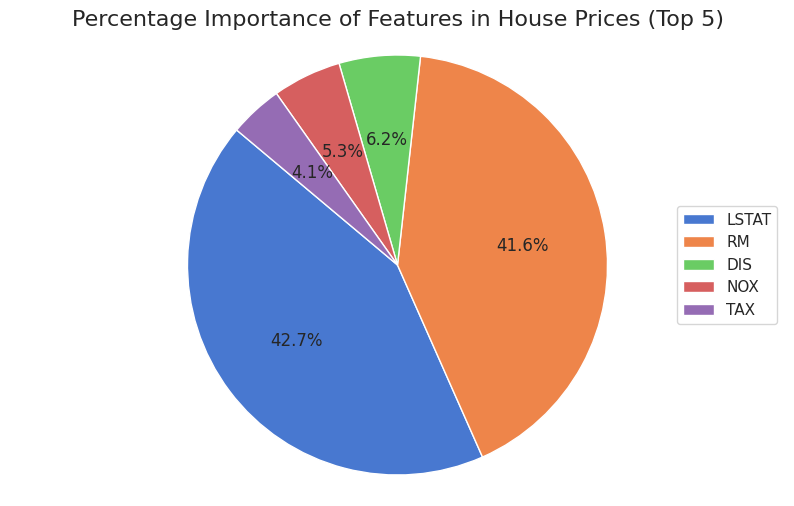

In [ ]:

'''
To visualise these results
'''

# Data for the pie chart
feature_importances_subset = [feature_importances[idx] for idx in top_feature_indices]
labels = [feature_names[idx] for idx in top_feature_indices]

# Create the pie chart
plt.figure(figsize=(10, 6))  # Increased height for the title
patches, texts, autotexts = plt.pie(feature_importances_subset, labels=None, startangle=140,
                                    autopct=lambda p: '{:.1f}%'.format(p) if p >= 4 else '')
for autotext in autotexts:
    autotext.set_fontsize(12)  # Increased font size for percentage labels
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Add legend using labels and set its position
plt.legend(labels, loc="right")

# Set the title and increase font size
plt.title("Percentage Importance of Features in House Prices (Top 5)", fontsize=16)

plt.show()


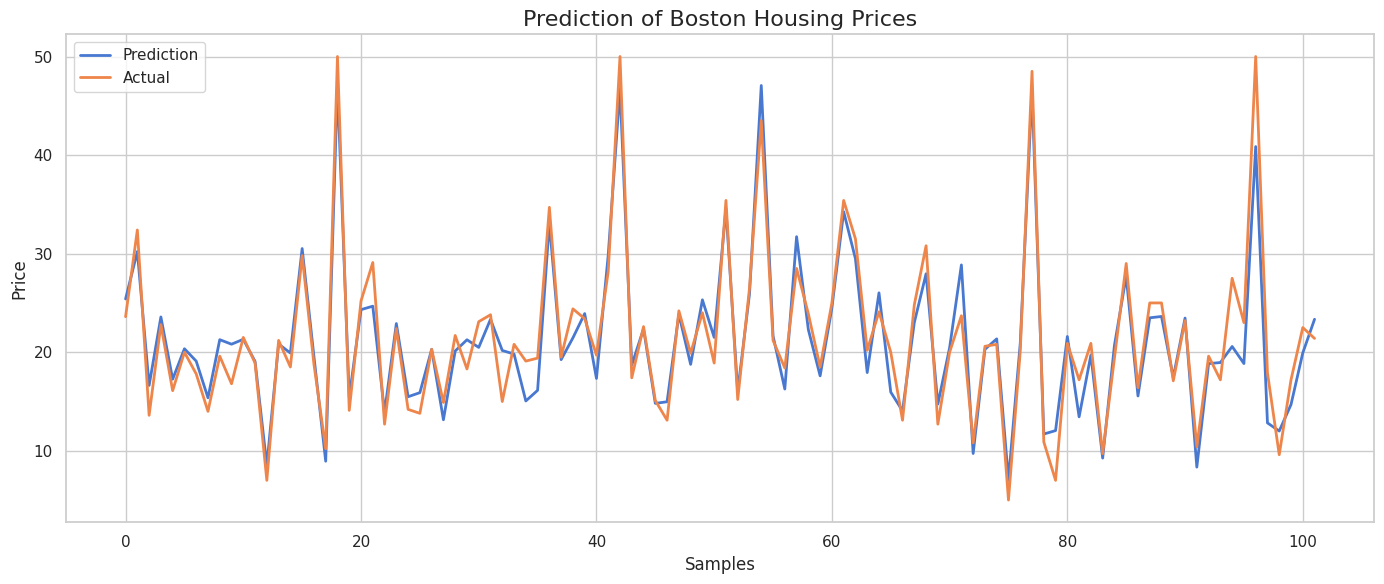

In [ ]:

'''
A view of a predictions vs actual prices.
'''

# Create a plot
plt.figure(figsize=(14, 6))
sns.lineplot(x=range(len(y_pred_xgb)), y=y_pred_xgb, label='Prediction', linewidth=2)
sns.lineplot(x=range(len(Y_test)), y=Y_test, label='Actual', linewidth=2)

# Add title and labels
plt.title('Prediction of Boston Housing Prices', fontsize=16)
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Add gridlines
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#
# End of Boston Housing
#